In [9]:
from pathlib import Path
from math import floor,log10
import json
from src.data_structures import Instance
from matplotlib import pyplot as plt
import numpy as np
from itertools import groupby
def round_sig(x, sig=2):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [10]:
#Cargo las instancias, y los resultados desde cada carpeta, y los combino
results_path = Path("final_results")
baldo_data_path = Path("baldo_test_data")
files = results_path.iterdir()
names_to_use = [file.name for file in files]
instances = [] 
for file in names_to_use:
    instance = Instance.from_file(baldo_data_path/file)
    instance.file_name = file
    instances.append(instance)
    result = open(results_path/instance.file_name,"r")
    result_data = json.load(result)
    result.close()
    instance.result = result_data
instances.sort(key=lambda x: x.n_items)

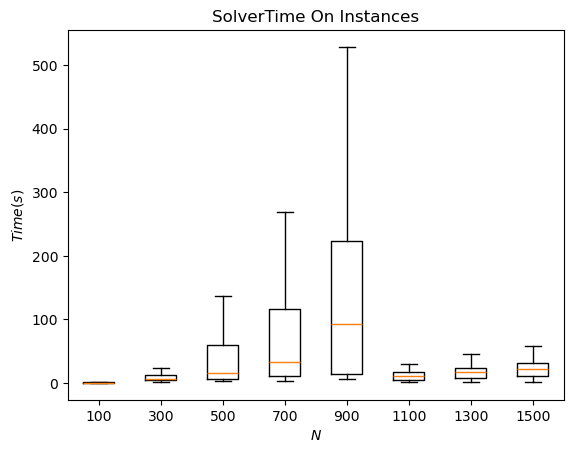

In [11]:
a = groupby(instances,key=lambda ins: ins.n_items)
todo = []
for key,group in a:
    points = [instance.result['Solver_time'] for instance in group]
    todo.append(points)
plt.title("SolverTime On Instances")
a = plt.boxplot(todo,showfliers=False)
plt.ylabel(r"$Time(s)$")
plt.xlabel(r"$N$")
_ = plt.xticks([i+1 for i in range(8)],[str(100 + i*200) for i in range(8)])
plt.savefig("assets/solver_times.png")
    


In [12]:
matrix = []
for instance in instances:
    if instance.result["Solver_of"] == -1:
        continue
    #if instance.result["BaldoML_of"] == -1:
    #    continue
    sol_of = instance.result["Solver_of"]
    sol_time = instance.result["Solver_time"] + 1
    gap = lambda instance,x: ((instance.result["Solver_of"]-instance.result[x])/instance.result["Solver_of"])*100
    points = []
    points.append((gap(instance,f"BaldoGA_of"),(instance.result[f"BaldoGA_time"])))
    points.append((gap(instance,f"BaldoML_of"),(instance.result[f"BaldoML_time"])))
    for i in range(1,2):
        threshold = round(0.05*i,3)
        points.append((gap(instance,f"Z_threshold{threshold}_of"),(instance.result[f"Z_threshold{threshold}_time"])))
    matrix.append(points)
matrix = np.array(matrix)

In [13]:
n = len(matrix[:,1,1])
#Tiempo total de ejecucion de baldo
print(f"Runtime Baldo: {np.sum(matrix[:,1,1])}")
print(f"Runtime Promedio Baldo: {np.sum(matrix[:,1,1])/n}")

#Tiempo total de ejecucion de Z
print(f"Runtime Z: {np.sum(matrix[:,2,1])}")
print(f"Runtime Promedio Z: {np.sum(matrix[:,2,1])/n}")



Runtime Baldo: 1859.8619830608368
Runtime Promedio Baldo: 1.171935717114579
Runtime Z: 4611.167855262756
Runtime Promedio Z: 2.9055878104995316
